In [48]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [49]:
dataDir='../../../data/'
dataType='train'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)

In [50]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [51]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
asile horizontal_sign obstacle other



In [52]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['asile','horizontal_sign','obstacle']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [6])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

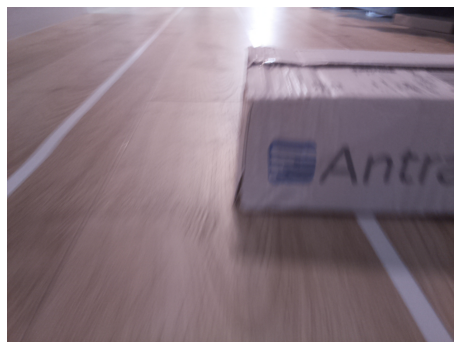

In [53]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(f"{dataDir}img/{img['file_name']}")
plt.axis('off')
plt.imshow(I)
plt.show()

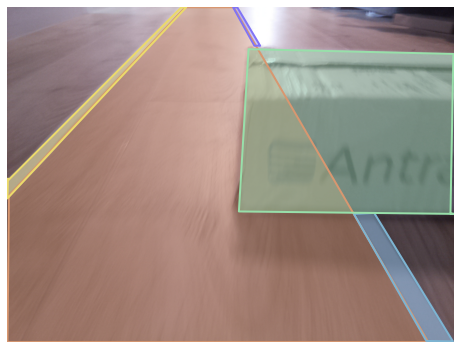

In [54]:

# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)